<a href="https://colab.research.google.com/github/JohnTaco93/IMS_training/blob/main/IMS_TRAINING_MINI_PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# IMS TRAINING - MINI-PROJECT: SEMICONDCUTOR ETCHING PROCESS FAULT DETECTION
# Exercise 1: Data Loading, Preprocessing, and Visualization

# Instruction
# ------------
# In this exercise, you will learn to 
# 1. Load data from pkl files
# 2. Delete invalid entries
# 3. Visualize raw data
# 4. Sort the data according to the correct order of time stamps

# Some of the example code can be uncommented for testing

In [110]:
#%% import the necessary Python libraries
import os, pickle, matplotlib.pyplot as plt, numpy as np, pandas as pd
from tqdm import tqdm

In [111]:
#%% Change to the root directory
# Example:
#os.chdir("C:/Users/Desktop/LAMDATA")
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
#%% Data Loading
# combine the calibration data into a unique list. Do the same procedure for
# test data
# read the other data (e.g. variables) if needed
# ================= Your Code Here ====================
#calibration data
path_data = "/content/gdrive/My Drive/colab taco/IMS_training/LAMDATA/"
cols=list(pd.read_csv(path_data+'variables.csv',header=None).iloc[:,0])
cols.append('run_number')
list_data_calibration=[]
for i in tqdm(range(108)):
  data_cal=pd.read_csv(path_data+'/calibration/calibration'+str(i+1)+'.csv',header=None)
  #print(data_cal.shape[0])
  data_cal['run_number']=i+1
  data_cal.columns=cols
  list_data_calibration.append(data_cal)


100%|██████████| 108/108 [00:00<00:00, 195.66it/s]


In [113]:
list_data_calibration[0].head()

,Time,Step Number,BCl3 Flow,Cl2 Flow,RF Btm Pwr,RF Btm Rfl Pwr,Endpt A,He Press,Pressure,RF Tuner,RF Load,RF Phase Err,RF Pwr,RF Impedance,TCP Tuner,TCP Phase Err,TCP Impedance,TCP Top Pwr,TCP Rfl Pwr,TCP Load,Vat Valve,run_number
0,11.946,4,751,753,132,0,626,100,1227,9408,9019,-362,26,16599,20028,-296,16848,360,0,27594,49,1
1,13.028,4,751,753,134,0,620,99,1229,9431,9029,-1455,26,16568,20042,-676,16796,350,0,27440,49,1
2,14.049,4,751,755,134,0,599,102,1221,9389,9114,-1056,25,16442,20146,-291,16512,344,0,27276,49,1
3,15.133,4,751,753,133,0,586,100,1201,9445,9031,-587,25,16960,20148,-262,17020,352,0,27330,50,1
4,16.139,4,751,754,132,0,587,102,1182,9456,9043,-124,25,16564,20226,-547,16440,346,0,27262,50,1


In [114]:
#test data
list_data_test=[]
for i in tqdm(range(21)):
  data_t=pd.read_csv(path_data+'/Test/test'+str(i+1)+'.csv',header=None)
  data_t['run_number']=i+1
  data_t.columns=cols
  list_data_test.append(data_t)

100%|██████████| 21/21 [00:00<00:00, 207.17it/s]


In [115]:
list_data_test[0].head()

,Time,Step Number,BCl3 Flow,Cl2 Flow,RF Btm Pwr,RF Btm Rfl Pwr,Endpt A,He Press,Pressure,RF Tuner,RF Load,RF Phase Err,RF Pwr,RF Impedance,TCP Tuner,TCP Phase Err,TCP Impedance,TCP Top Pwr,TCP Rfl Pwr,TCP Load,Vat Valve,run_number
0,9.1782,4,751,753,133.0,0,864,101,1225,9467,8961,-147,25,16678,19590,-651,16298,350.86,0,27758,49,1
1,10.1980,4,751,753,134.0,0,833,100,1223,9425,8927,-1392,25,16454,19592,-23,16442,342.86,0,27632,49,1
2,11.2180,4,751,755,134.0,0,828,99,1222,9475,8881,-1599,26,16376,19592,-35,16612,354.86,0,27622,49,1
3,12.2380,4,751,752,132.0,0,800,101,1212,9493,8879,57,25,16342,19644,-762,16752,352.86,0,27528,49,1
4,13.2580,4,751,755,132.0,0,780,100,1188,9428,8981,104,25,16467,19622,159,16888,352.86,0,27550,50,1


In [116]:
#%% Delete invalid entries
#Observe the number of samples in each run, delete the runs that have less 
#than 56 samples
# ================= Your Code Here ====================
#Example of deleting the 10th row of "data": del data_c[10]

for d,i in zip(list_data_calibration,range(len(list_data_calibration))):
  if d.shape[0]<56:
    del list_data_calibration[i]


Text(0.5, 1.0, 'Time vs Pressure')

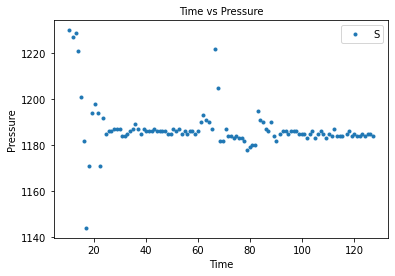

In [117]:
#%% Visualization
#Plot one sensor signal in one run (one data cell), and observer whether
#there is any issue

# ================= Your Code Here ====================
x = list_data_calibration[0]['Time']
y = list_data_calibration[0]['Pressure']
plt.plot(x,y,'.')
plt.legend('Sin Wave')
plt.xlabel('Time');
plt.ylabel('Pressure');
plt.title('Time vs Pressure')

#coments: There are outliers in the beggining and in the middle of the dataset. 


In [118]:
#%% Sort Data According to Time Stamp
#Apply for only time stamp column first, and then apply it to one run
#After sucessfully trying for one run, apply it to another run

# ================= Your Code Here ====================
#Example of sorting in ascending order along column 0:
#a = a[a[:,0].argsort()]
for df,i in zip(list_data_calibration,range(len(list_data_calibration))):
  list_data_calibration[i]=df.iloc[df.iloc[:,0].argsort()]

for df,i in zip(list_data_test,range(len(list_data_test))):
  list_data_test[i]=df.iloc[df.iloc[:,0].argsort()]

In [119]:
list_data_calibration[0].head()

,Time,Step Number,BCl3 Flow,Cl2 Flow,RF Btm Pwr,RF Btm Rfl Pwr,Endpt A,He Press,Pressure,RF Tuner,RF Load,RF Phase Err,RF Pwr,RF Impedance,TCP Tuner,TCP Phase Err,TCP Impedance,TCP Top Pwr,TCP Rfl Pwr,TCP Load,Vat Valve,run_number
111,10.379,4,752,752,131,0,643,101,1230,9431,9029,-250,25,16663,20024,56,16552,346,0,27626,49,1
0,11.946,4,751,753,132,0,626,100,1227,9408,9019,-362,26,16599,20028,-296,16848,360,0,27594,49,1
1,13.028,4,751,753,134,0,620,99,1229,9431,9029,-1455,26,16568,20042,-676,16796,350,0,27440,49,1
2,14.049,4,751,755,134,0,599,102,1221,9389,9114,-1056,25,16442,20146,-291,16512,344,0,27276,49,1
3,15.133,4,751,753,133,0,586,100,1201,9445,9031,-587,25,16960,20148,-262,17020,352,0,27330,50,1


In [120]:
#%% Basic understanding of the data by visualuzation
#Plot different sensor output (different columns) vs the time stamp for different 
#wafers (e.g. twenty wafers)
# it is recommended to write function for plots
# ================= Your Code Here ====================
# write a function like visplot(column)
# Step Number(column No.1)
#def visplot(column)
#for m in range(20):
#    data_c3 = data_c2[m]
#    plt.figure(2)
#    plt.rc('font', size=4)
#    plt.rc('axes', titlesize=4)
#    plt.subplot(5,4,m+1)
#    plt.plot(data_c3[:,0],data_c3[:,1])
#    plt.xlabel('Time')
#    plt.ylabel('Step Number')
#    plt.title('Sample No.%i'%(m+1))
#    plt.tight_layout()

In [121]:
def visplot(column,data_c2):
  for m in range(20):
      data_c3 = data_c2[m]
      plt.figure(2)
      plt.figure(figsize=(20,10))
      plt.rc('font', size=10)
      plt.rc('axes', titlesize=10)
      plt.subplot(5,4,m+1)
      plt.plot(data_c3.iloc[:,0],data_c3[column],'.')
      plt.xlabel('Time')
      plt.ylabel(column)
      plt.title('Sample No.%i'%(m+1))
      plt.tight_layout()
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<Figure size 432x288 with 0 Axes>

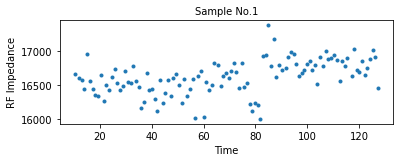

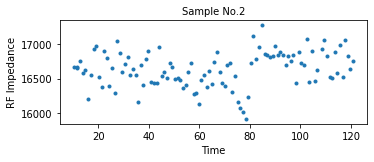

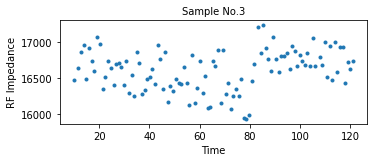

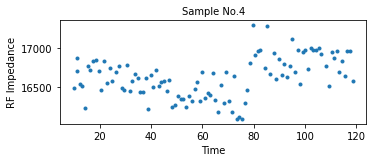

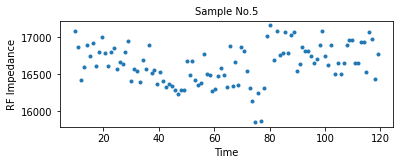

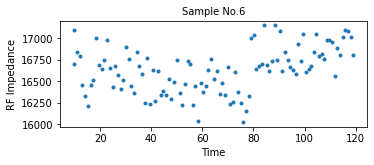

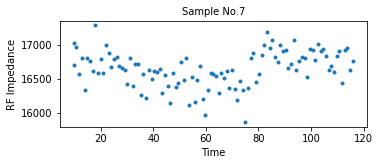

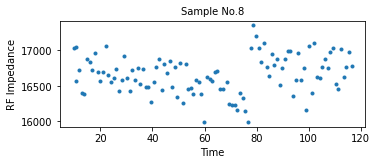

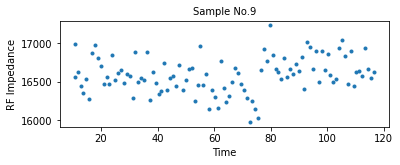

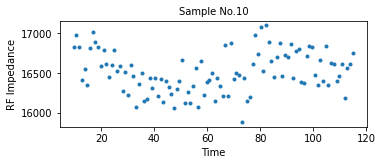

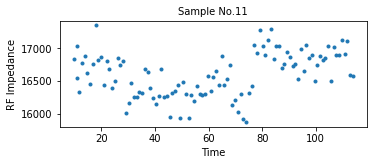

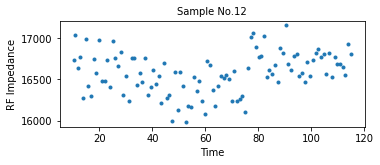

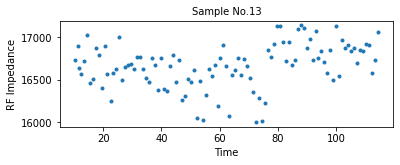

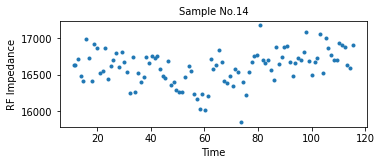

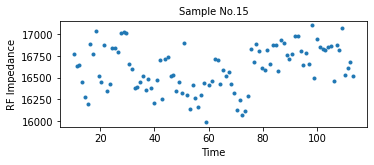

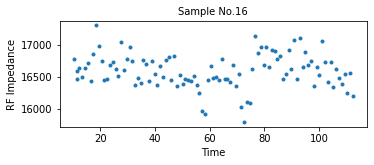

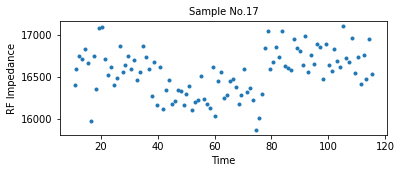

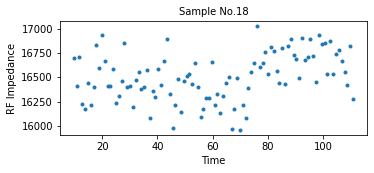

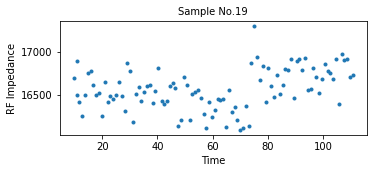

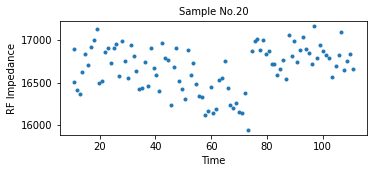

In [122]:
visplot(column='RF Impedance',data_c2=list_data_calibration)

In [123]:
# define a function to plot the comparison of different faulty and healthy data
# ================= Your Code Here ====================
#def hvf(calibration,test,column):
def hvf(calibration,test,column):
  for m in range(20):
      data_c3 = calibration[m]
      data_c4 = test[m]
      plt.figure(2)
      plt.figure(figsize=(20,10))
      plt.rc('font', size=10)
      plt.rc('axes', titlesize=10)
      plt.subplot(5,4,m+1)
      plt.plot(data_c3.iloc[:,0],data_c3[column],'.',label="faulty")
      plt.legend()
      plt.plot(data_c4.iloc[:,0],data_c4[column],'.',label="healthy")
      plt.legend()
      plt.xlabel('Time')
      plt.ylabel(column)
      plt.title('Sample No.%i'%(m+1))
      plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

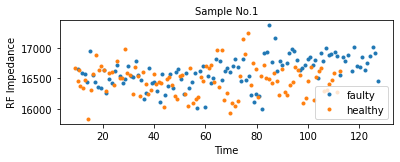

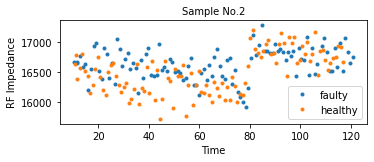

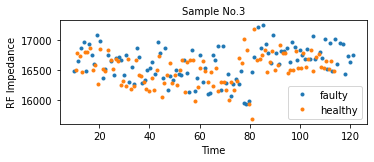

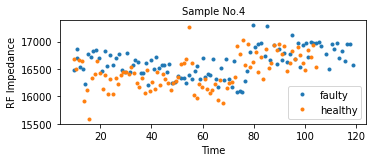

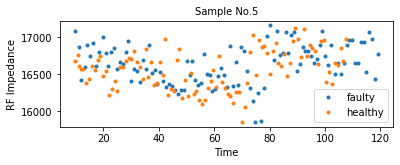

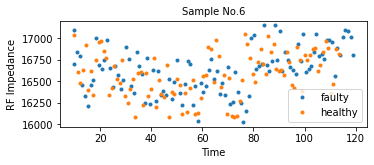

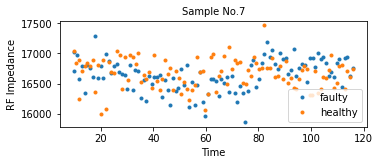

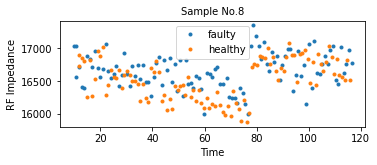

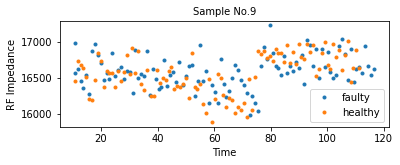

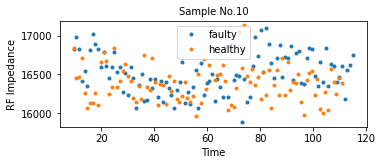

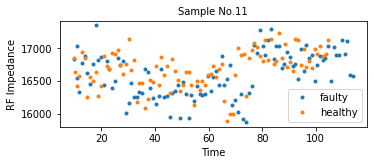

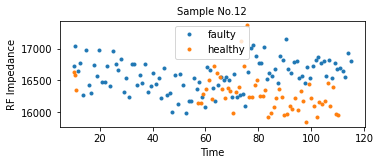

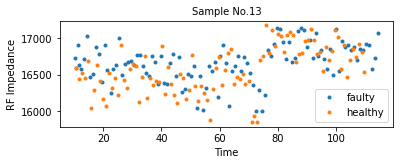

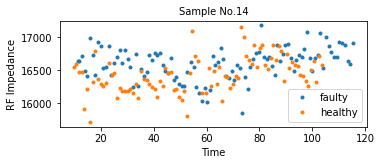

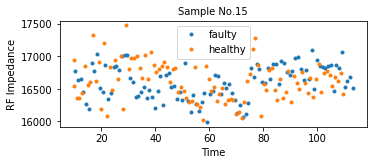

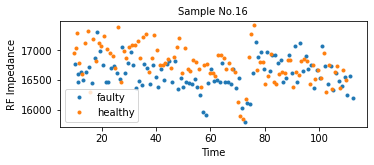

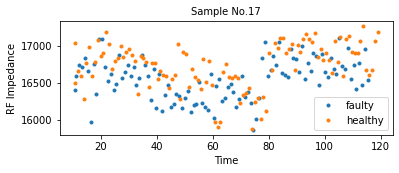

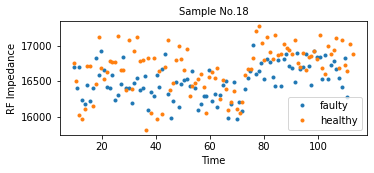

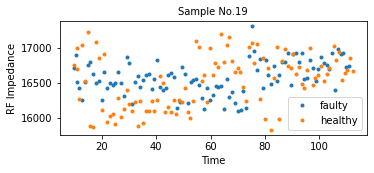

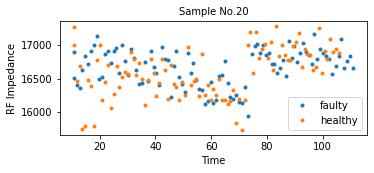

In [124]:
hvf(calibration=list_data_calibration,test=list_data_test,column='RF Impedance')

In [125]:
#%% export the data as CSV file
# It is recommended to use "to_csv" for exporting to CSV
# ================= Your Code Here ====================
#merging all runs toguether
calibration=pd.concat(list_data_calibration)
test=pd.concat(list_data_test)
#exporting to csv
calibration.to_csv(path_data+'calibration_all.csv',index=False)
test.to_csv(path_data+'test_all.csv',index=False)



In [126]:
#exporting each run separately

#calibration data
size_cal=len(list_data_calibration)
for df,i in zip(list_data_calibration, range(size_cal)):
  df.to_csv(path_data+'calibration_new_'+str(i+1)+'.csv')

#Test data
size_cal=len(list_data_calibration)
for df,i in zip(list_data_calibration, range(size_cal)):
  df.to_csv(path_data+'test_new_'+str(i+1)+'.csv')